# Визуализация данных - ДЗ

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from pylab import rcParams
rcParams['figure.figsize'] = 13,6

In [3]:
# https://www.kaggle.com/sakshigoyal7/credit-card-customers,
# переименовал в файле последние два солбца, названия слишком длинные 
df = pd.read_csv('BankChurners.csv')

## Проверяем что у нас в данных

In [4]:
df.head(10)

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   
5  713061558  Existing Customer            44      M                2   
6  810347208  Existing Customer            51      M                4   
7  818906208  Existing Customer            32      M                0   
8  710930508  Existing Customer            37      M                3   
9  719661558  Existing Customer            48      M                2   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   
5        Graduate        Married     $40K - $60K          Blue   
6         Unknown        Married         $120K +          Gold   
7     High School        Unknown     $60K - $80K        Silver   
8      Uneducated         Single     $60K - $80K          Blue   
9        Graduate         Single    $80K - $120K          Blue   

   Months_on_book  ...  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0              39  ...       12691.0                  777          11914.0   
1              44  ...        8256.0                  864           7392.0   
2              36  ...        3418.0                    0           3418.0   
3              34  ...        3313.0                 2517            796.0   
4              21  ...        4716.0                    0           4716.0   
5              36  ...        4010.0                 1247           2763.0   
6              46  ...       34516.0                 2264          32252.0   
7              27  ...       29081.0                 1396          27685.0   
8              36  ...       22352.0                 2517          19835.0   
9              36  ...       11656.0                 1677           9979.0   

   Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0                 1.335             1144              42                1.625   
1                 1.541             1291              33                3.714   
2                 2.594             1887              20                2.333   
3                 1.405             1171              20                2.333   
4                 2.175              816              28                2.500   
5                 1.376             1088              24                0.846   
6                 1.975             1330              31                0.722   
7                 2.204             1538              36                0.714   
8                 3.355             1350              24                1.182   
9                 1.524             1441              32                0.882   

   Avg_Utilization_Ratio  Naive_Bayes_12_mon_1  Naive_Bayes_12_mon_2  
0                  0.061              0.000093               0.99991  
1                  0.105              0.000057               0.99994  
2                  0.000              0.000021               0.99998  
3                  0.760              0.000134               0.99987  
4                  0.000              0.000022               0.99998  
5                  0.311              0.000055               0.99994  
6                  0.066              0.000123               0.99988  
7                  0.048              0.000086               0.99991  
8                  0.113              0.000045               0.99996  
9          

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

Попались хорошие данные, нет пропусков

In [6]:
df.describe()

CLIENTNUM  Customer_Age  Dependent_count  Months_on_book  \
count  1.012700e+04  10127.000000     10127.000000    10127.000000   
mean   7.391776e+08     46.325960         2.346203       35.928409   
std    3.690378e+07      8.016814         1.298908        7.986416   
min    7.080821e+08     26.000000         0.000000       13.000000   
25%    7.130368e+08     41.000000         1.000000       31.000000   
50%    7.179264e+08     46.000000         2.000000       36.000000   
75%    7.731435e+08     52.000000         3.000000       40.000000   
max    8.283431e+08     73.000000         5.000000       56.000000   

       Total_Relationship_Count  Months_Inactive_12_mon  \
count              10127.000000            10127.000000   
mean                   3.812580                2.341167   
std                    1.554408                1.010622   
min                    1.000000                0.000000   
25%                    3.000000                2.000000   
50%                    4.000000                2.000000   
75%                    5.000000                3.000000   
max                    6.000000                6.000000   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
count           10127.000000  10127.000000         10127.000000   
mean                2.455317   8631.953698          1162.814061   
std                 1.106225   9088.776650           814.987335   
min                 0.000000   1438.300000             0.000000   
25%                 2.000000   2555.000000           359.000000   
50%                 2.000000   4549.000000          1276.000000   
75%                 3.000000  11067.500000          1784.000000   
max                 6.000000  34516.000000          2517.000000   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
count     10127.000000          10127.000000     10127.000000    10127.000000   
mean       7469.139637              0.759941      4404.086304       64.858695   
std        9090.685324              0.219207      3397.129254       23.472570   
min           3.000000              0.000000       510.000000       10.000000   
25%        1324.500000              0.631000      2155.500000       45.000000   
50%        3474.000000              0.736000      3899.000000       67.000000   
75%        9859.000000              0.859000      4741.000000       81.000000   
max       34516.000000              3.397000     18484.000000      139.000000   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  Naive_Bayes_12_mon_1  \
count         10127.000000           10127.000000          10127.000000   
mean              0.712222               0.274894              0.159997   
std               0.238086               0.275691              0.365301   
min               0.000000               0.000000              0.000008   
25%               0.582000               0.023000              0.000099   
50%               0.702000               0.176000              0.000181   
75%               0.818000               0.503000              0.000337   
max               3.714000               0.999000              0.999580   

       Naive_Bayes_12_mon_2  
count          10127.000000  
mean               0.840003  
std                0.365301  
min                0.000420  
25%                0.999660  
50%                0.999820  
75%                0.999900  
max                0.999990

## pair plot (scatter plot matrix)

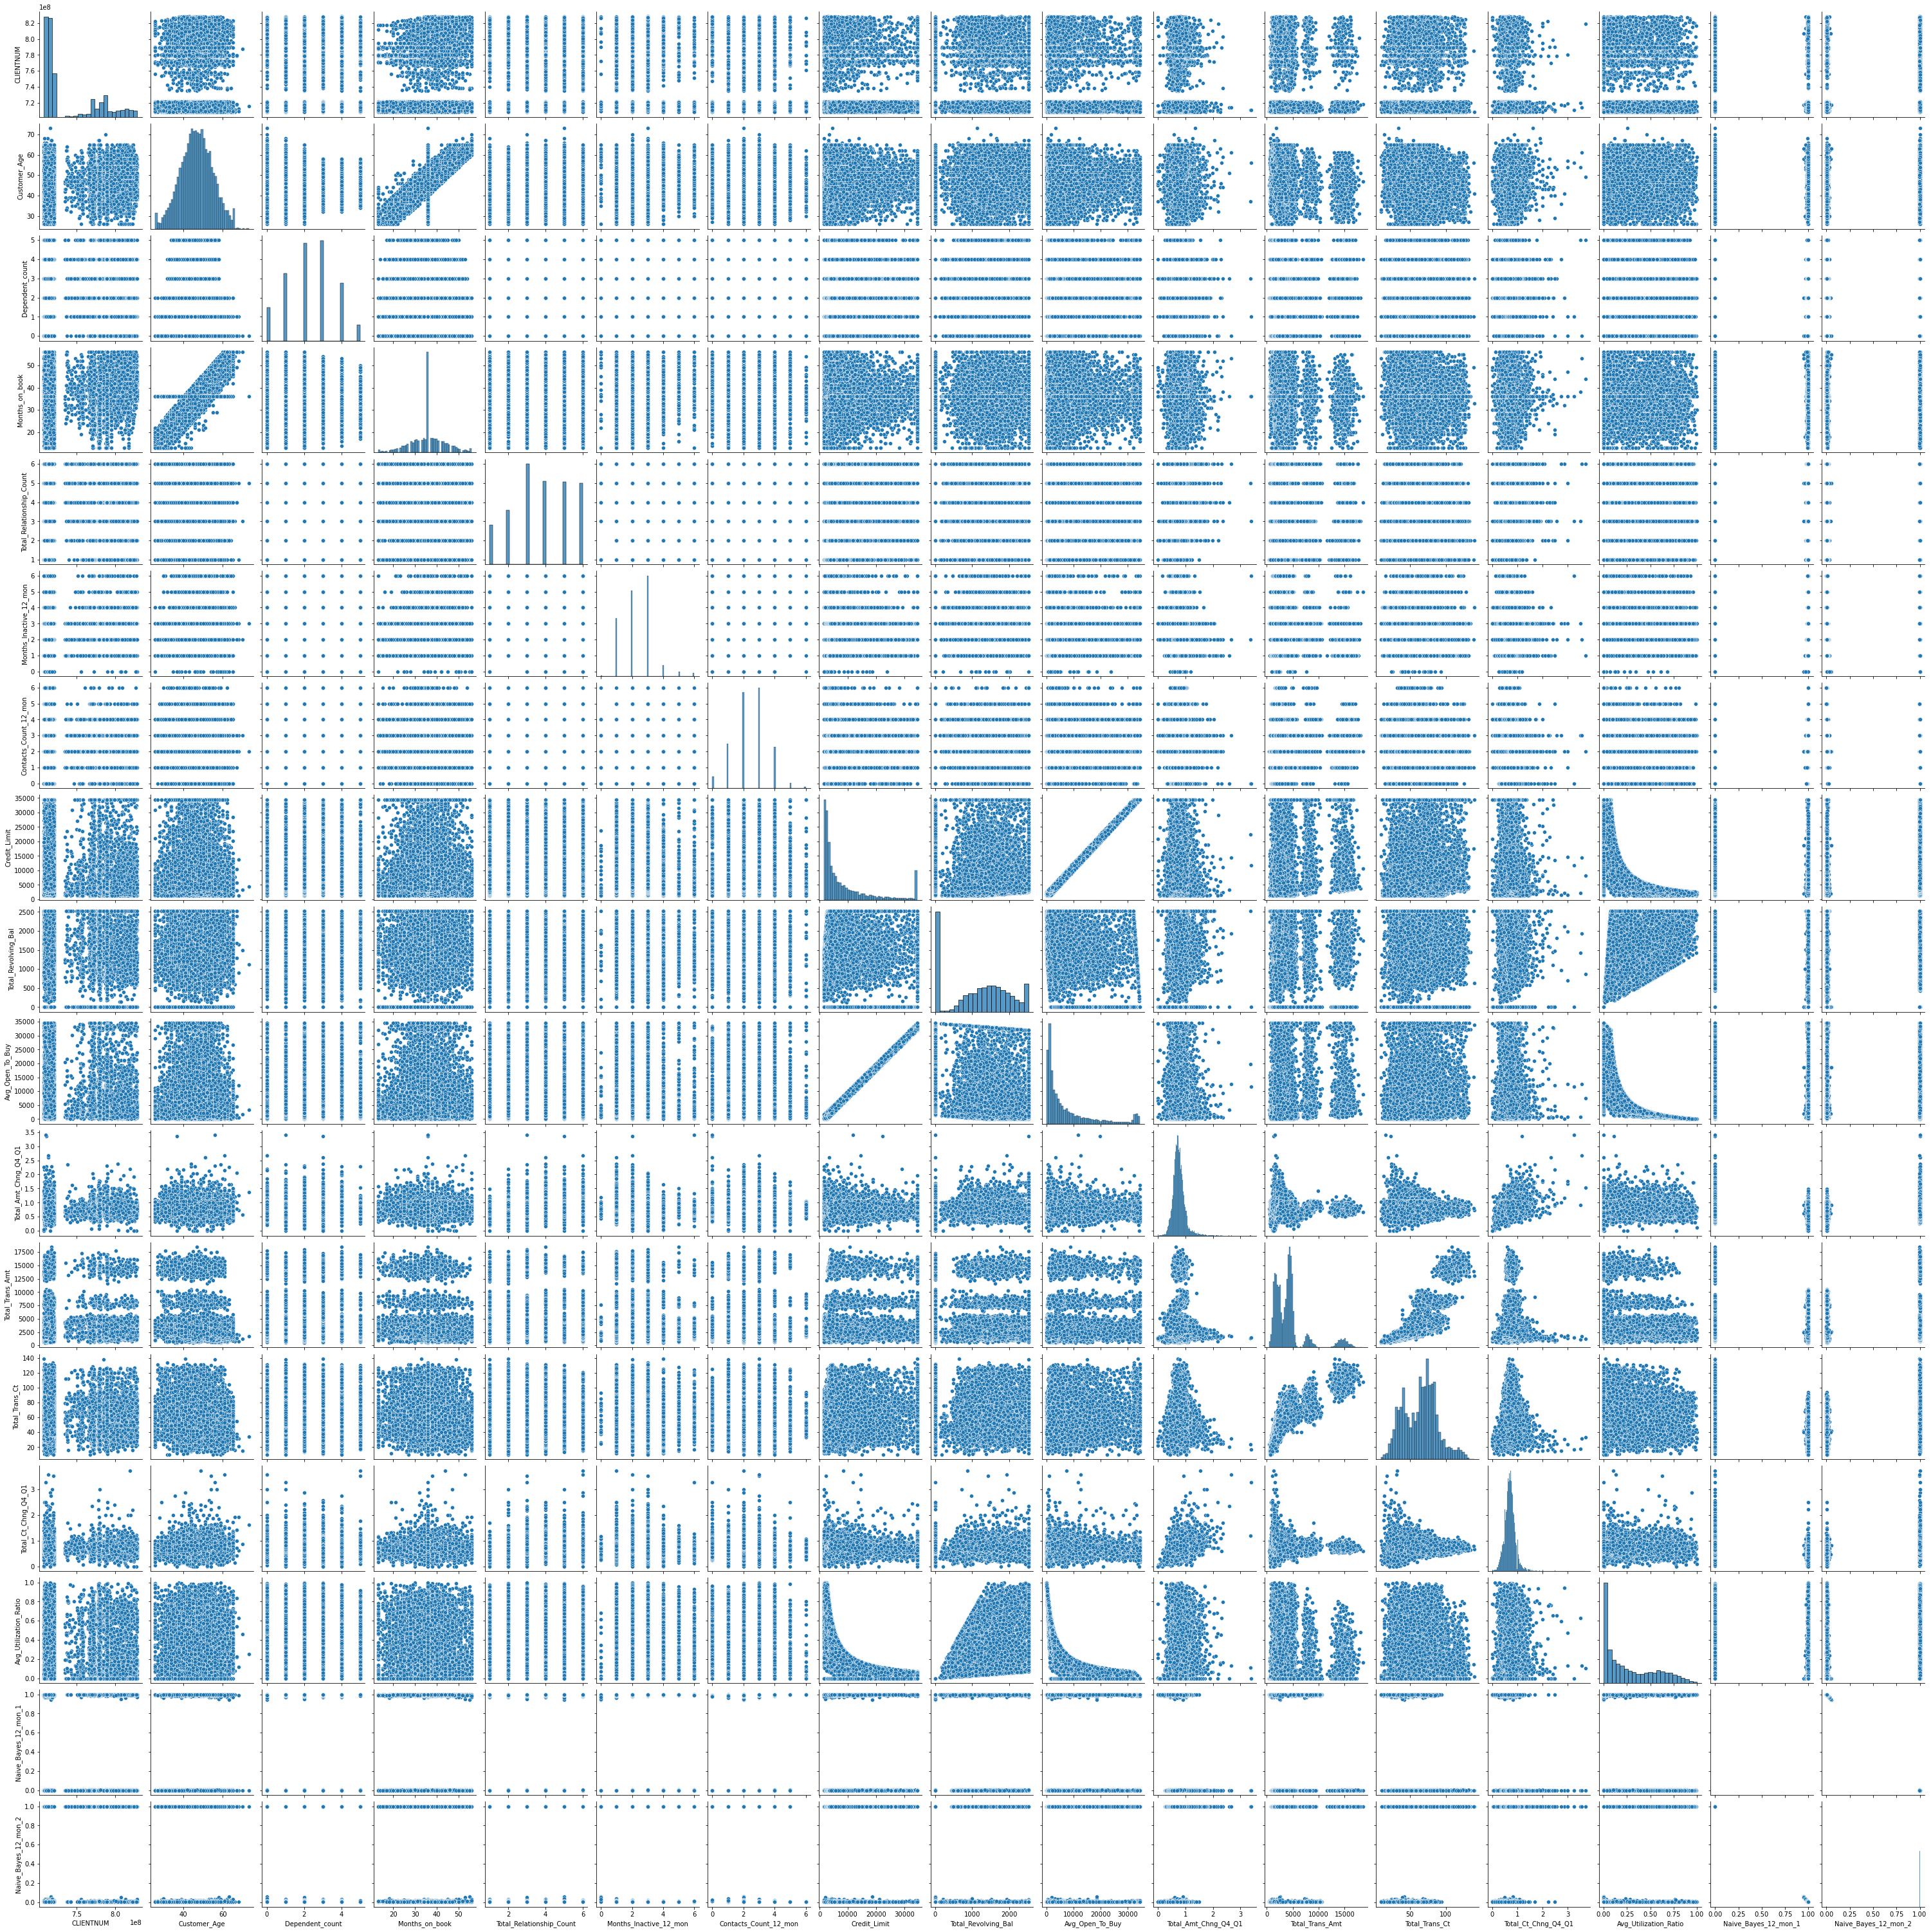

In [7]:
sns.pairplot(df)

### Предпочтение категории карт по возрасту

Text(0, 0.5, 'Количество, штук')

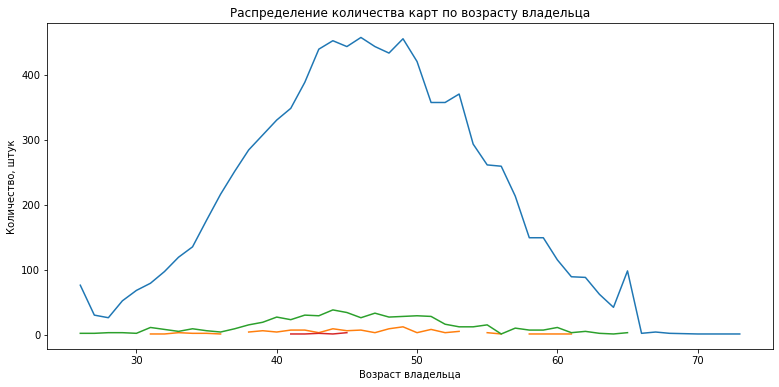

In [42]:
df_type_count_by_age = (
    df[['Customer_Age', 'Card_Category', 'CLIENTNUM']]
        .groupby(['Customer_Age', 'Card_Category'])
        .count()
        .reset_index()
        .pivot(index='Customer_Age', columns='Card_Category', values='CLIENTNUM')
)

for card_type in df['Card_Category'].unique():
    plt.plot(df_type_count_by_age.index, df_type_count_by_age[card_type])

plt.title('Распределение количества карт по возрасту владельца')
plt.xlabel('Возраст владельца')
plt.ylabel('Количество, штук')

Убираем 'Blue' тип и строим другой график

<AxesSubplot:xlabel='Customer_Age'>

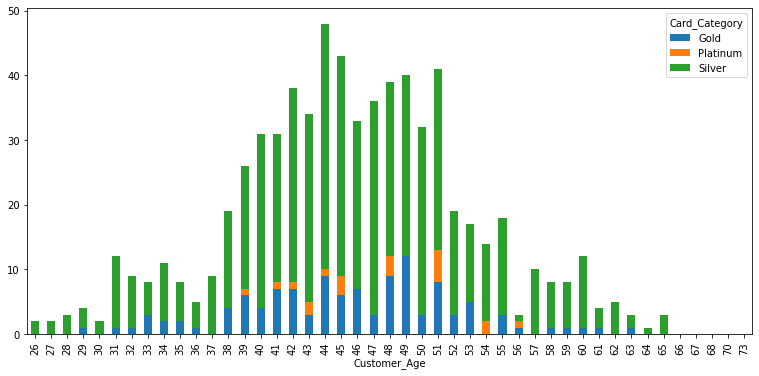

In [34]:
df_type_count_by_age = (
    df[['Customer_Age', 'Card_Category', 'CLIENTNUM']]
        .groupby(['Customer_Age', 'Card_Category'])
        .count()
        .reset_index()
        .pivot(index='Customer_Age', columns='Card_Category', values='CLIENTNUM')
)

df_type_count_by_age.drop('Blue', axis=1).plot(kind='bar', stacked=True)

## Зависимость входящих средств от образования

<AxesSubplot:xlabel='Education_Level', ylabel='Income_Category'>

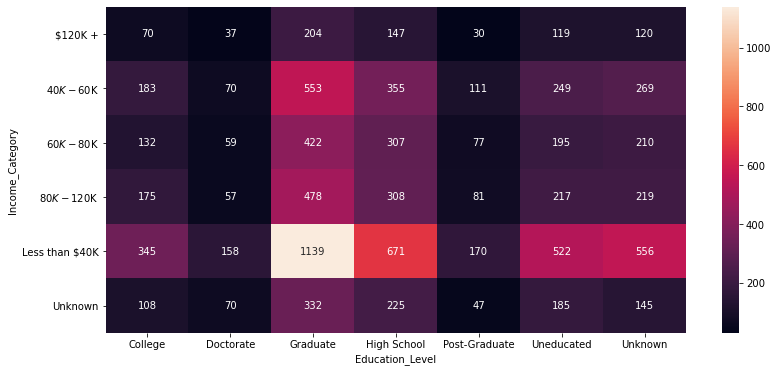

In [54]:
df_1 = (df[['Income_Category', 'Education_Level', 'CLIENTNUM']]
        .groupby(['Income_Category', 'Education_Level'])
        .count()
        .reset_index()
        .pivot(index='Income_Category', columns='Education_Level', values='CLIENTNUM')
)

# df_1.head(100)

sns.heatmap(df_1, annot=True, fmt="d")

## Входящие средства от пола держателя карты

<AxesSubplot:xlabel='Income_Category'>

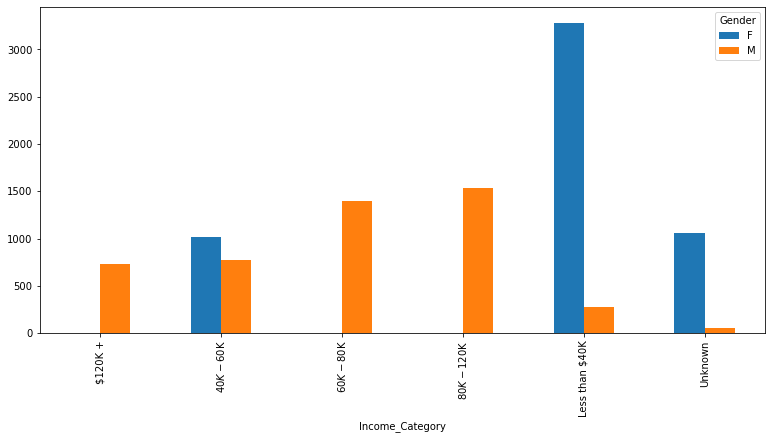

In [62]:
df_2 = df[['Income_Category', 'Gender', 'CLIENTNUM']].pivot_table(
                        index='Income_Category', 
                        columns='Gender', 
                        values='CLIENTNUM', 
                        aggfunc='count').fillna(0)

df_2.plot(kind='bar')

## Возраст держателей по типу карт

<AxesSubplot:xlabel='Card_Category', ylabel='Customer_Age'>

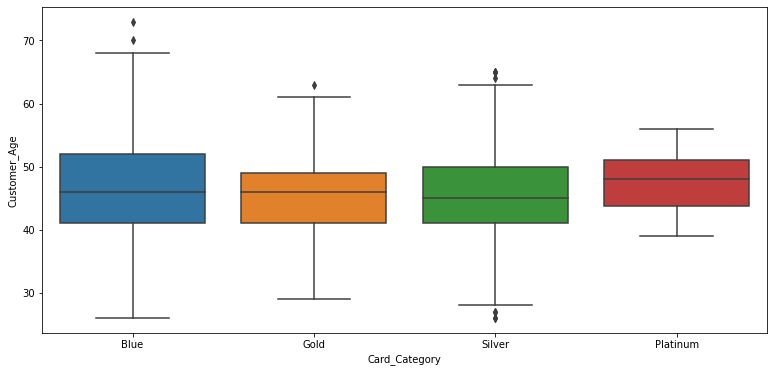

In [72]:
sns.boxplot(x="Card_Category", y="Customer_Age", data=df)